# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus Project

**AI-Generated Content Warning:** This notebook was AI-generated and has not been fully verified. Results and code should be cautiously interpreted.

## Overview

This Dandiset, titled "Allen Institute Openscope - Vision2Hippocampus project," is focused on understanding neural representations of stimuli from the thalamus to the hippocampus in the mouse brain.

You can explore the Dandiset at [https://dandiarchive.org/dandiset/000690](https://dandiarchive.org/dandiset/000690).

## Summary of the Notebook

- Load Dandiset data using the DANDI API.
- Explore and visualize corneal reflection tracking for eye movements.
- Explore and visualize running wheel rotation data.

Required packages: `dandi`, `h5py`, `remfile`, `matplotlib`, `pynwb`.

## Loading Dandiset with DANDI API


In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

# NWB file for exploration
nwb_url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
print(f"\nViewing file: {nwb_url}")
print("For more information, explore on [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft)")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

Found 156 assets in the dataset

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb

Viewing file: https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/
For more information, explore on [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft)


## Visualizing Eye-Tracking Data


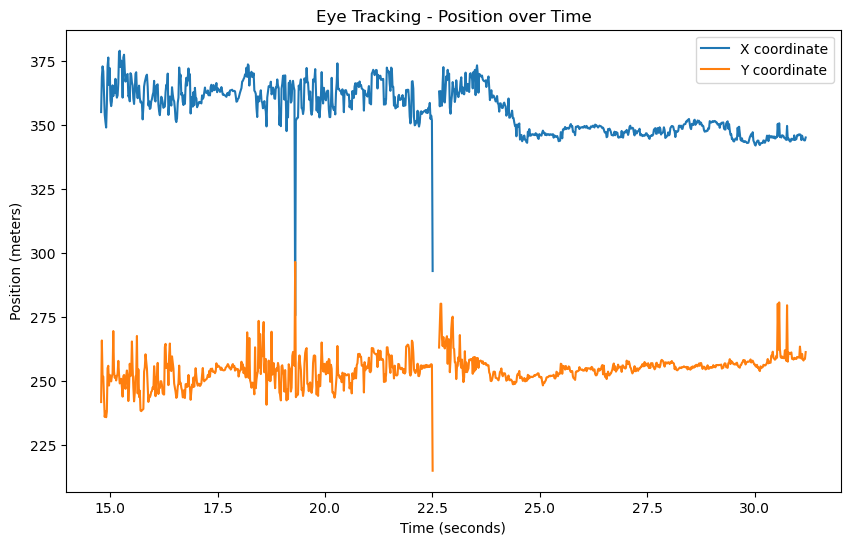

In [2]:
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

# Load the NWB file
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)

# Access the dataset for eye tracking spatial series
timestamps = h5_file['/acquisition/EyeTracking/eye_tracking/timestamps'][:]
data = h5_file['/acquisition/EyeTracking/eye_tracking/data'][:]

# Sample data for visualization
sample_size = 1000
timestamps_sample = timestamps[:sample_size]
data_sample = data[:sample_size, :]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(timestamps_sample, data_sample[:, 0], label="X coordinate")
plt.plot(timestamps_sample, data_sample[:, 1], label="Y coordinate")
plt.xlabel("Time (seconds)")
plt.ylabel("Position (meters)")
plt.title("Eye Tracking - Position over Time")
plt.legend()
plt.show()

# Close the file
h5_file.close()

## Visualizing Running Wheel Data


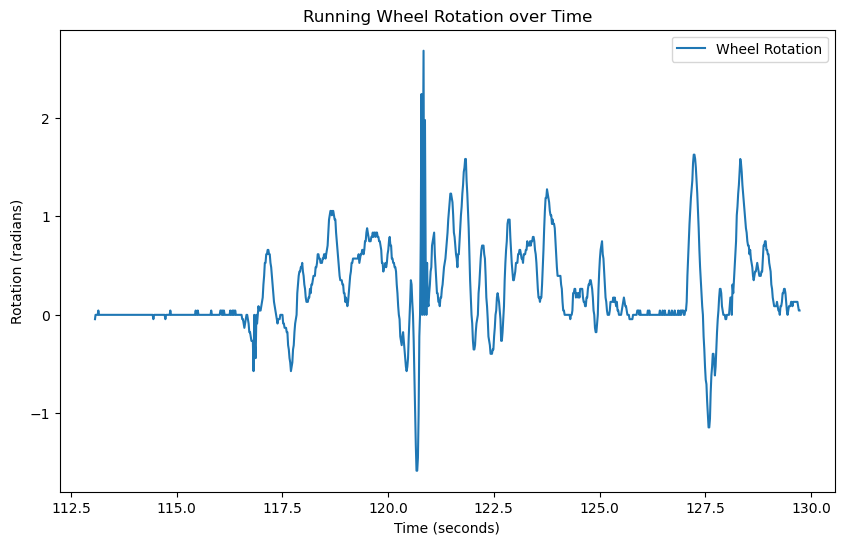

In [3]:
# Load the NWB file again for running wheel data
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)

# Access the dataset for running wheel rotation
timestamps = h5_file['/acquisition/raw_running_wheel_rotation/timestamps'][:]
data = h5_file['/acquisition/raw_running_wheel_rotation/data'][:]

# Sample data for visualization
sample_size = 1000
timestamps_sample = timestamps[:sample_size]
data_sample = data[:sample_size]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(timestamps_sample, data_sample, label="Wheel Rotation")
plt.xlabel("Time (seconds)")
plt.ylabel("Rotation (radians)")
plt.title("Running Wheel Rotation over Time")
plt.legend()
plt.show()

# Close the file
h5_file.close()

## Summary and Future Directions

The visualizations here offered insights into eye-tracking and running wheel behavior using the NWB files from Dandiset 000690.

### Possible Future Directions:
- Further exploration of spike sorting data.
- Analysis of neural response to visual stimuli.
- Integration of multiple sessions for comparative analysis.